In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
data = pd.read_csv('audi.csv')

In [166]:
data.shape

(10668, 9)

In [167]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [168]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [169]:
data['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [170]:
data['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [171]:
data['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [172]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


<AxesSubplot:>

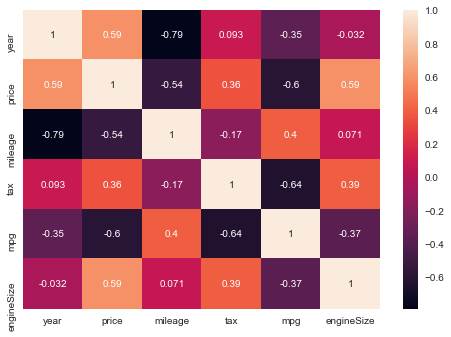

In [173]:
sns.heatmap(data.corr(), annot=True)

Text(0, 0.5, 'Price')

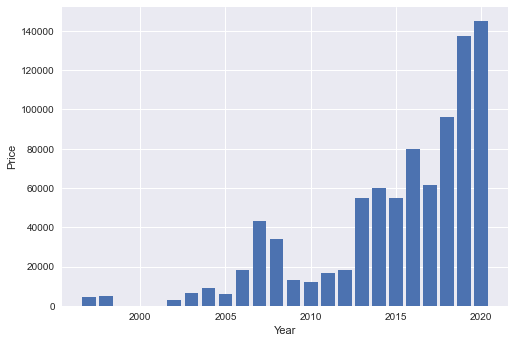

In [11]:
plt.style.use('seaborn')
plt.bar(data.year, data.price)
plt.xlabel('Year')
plt.ylabel('Price')

Text(0, 0.5, 'Model')

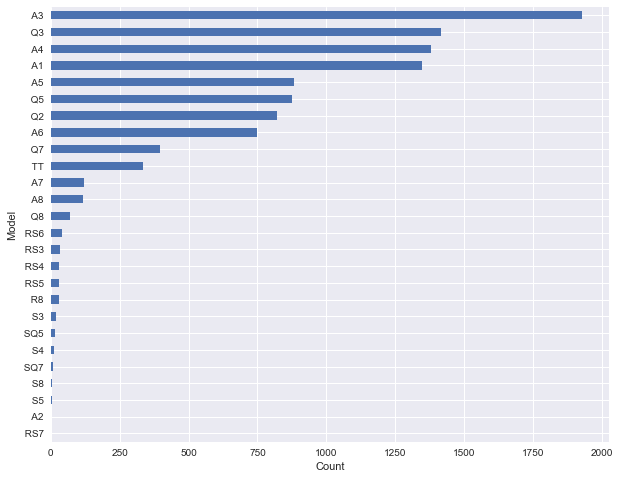

In [12]:
plt.figure(figsize=(10, 8))
data['model'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Model')

Text(0, 0.5, 'Price')

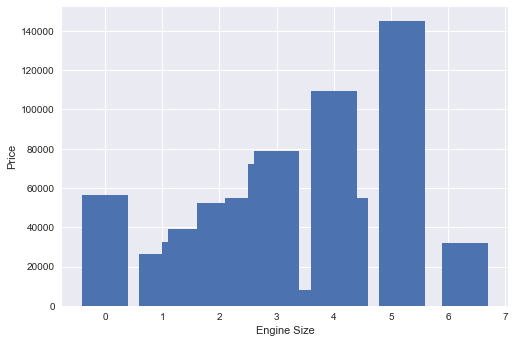

In [13]:
plt.bar(data.engineSize, data.price)
plt.xlabel('Engine Size')
plt.ylabel('Price')

Text(0, 0.5, 'Mileage')

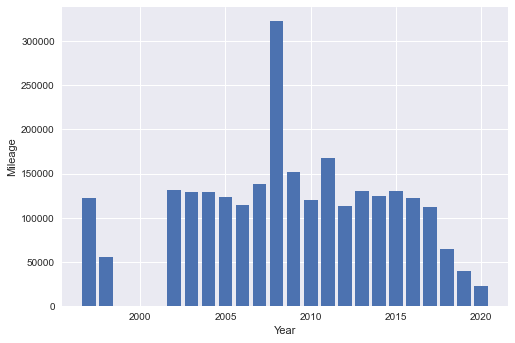

In [14]:
plt.bar(data.year, data.mileage)
plt.xlabel('Year')
plt.ylabel('Mileage')

Text(0, 0.5, 'MPG')

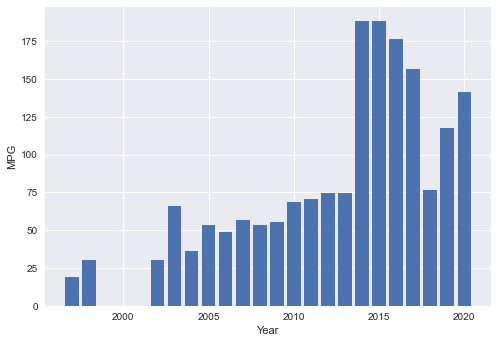

In [15]:
plt.bar(data.year, data.mpg)
plt.xlabel('Year')
plt.ylabel('MPG')

Text(0, 0.5, 'Mileage')

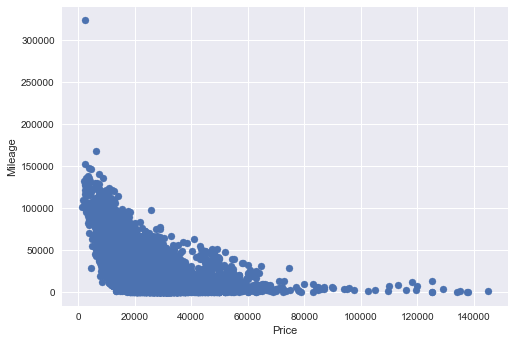

In [40]:
plt.scatter(data.price, data.mileage)
plt.xlabel('Price')
plt.ylabel('Mileage')

Text(0, 0.5, 'MPG')

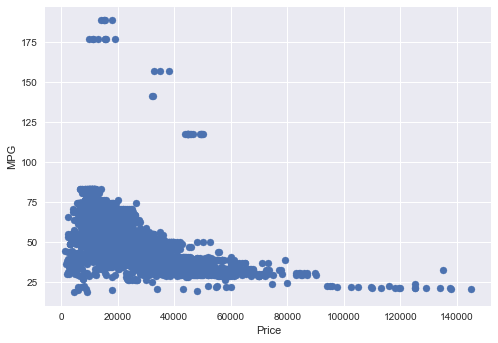

In [17]:
plt.scatter(data.price, data.mpg)
plt.xlabel('Price')
plt.ylabel('MPG')

Text(0, 0.5, 'mileage')

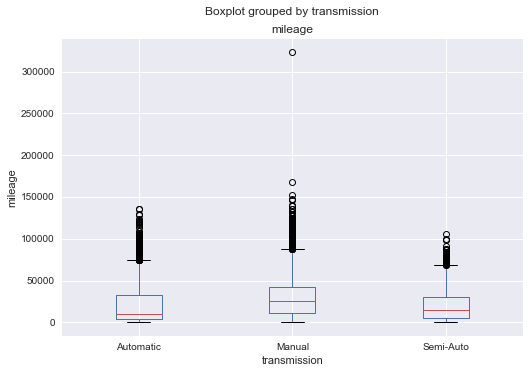

In [181]:
data.boxplot(column='mileage', by='transmission')
plt.ylabel('mileage')

In [182]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [183]:
data['Fueltype'] = label_encoder.fit_transform(data['fuelType'])
data['Transmission'] = label_encoder.fit_transform(data['transmission'])
data['Model'] = label_encoder.fit_transform(data['model'])

In [184]:
data.drop(['model', 'transmission', 'fuelType'], axis=1, inplace=True)

In [185]:
data.head()

,year,price,mileage,tax,mpg,engineSize,Fueltype,Transmission,Model
0,2017,12500,15735,150,55.4,1.4,2,1,0
1,2016,16500,36203,20,64.2,2.0,0,0,5
2,2016,11000,29946,30,55.4,1.4,2,1,0
3,2017,16800,25952,145,67.3,2.0,0,0,3
4,2019,17300,1998,145,49.6,1.0,2,1,2


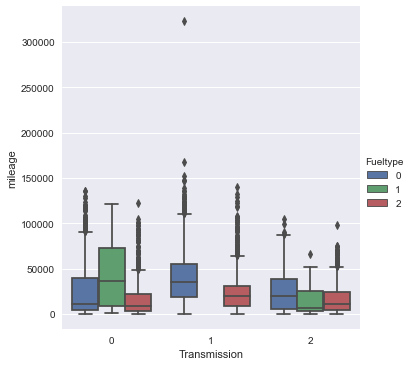

In [186]:
sns.catplot(data=data, x='Transmission', y='mileage', hue='Fueltype', kind='box')

###  FUELTYPE                                                                                                                                                                           
     -Diesel: 0
     -Hybrid: 1
     -Petrol: 2
### TRANSMISSION
     -Automatic: 0
     -Manual: 1
     -SemiAuto: 2

In [187]:
x = data.drop('price', axis=1).values
y = data.price.values

In [217]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### LinearRegression

In [218]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [219]:
reg.fit(x_train, y_train)

LinearRegression()

In [220]:
reg.predict(x_test)

array([22851.60748771, 19531.35379438, 23279.09794166, ...,
       35892.23439676, 17255.64589671, 11081.27715644])

In [221]:
reg.score(x_test, y_test)

0.7908121242345288